"""
Semi-Analytic solution for Anada Wijesinghe (1986) https://doi.org/10.2172/59961

a constant load is applied at one end of a fracture and drainage is allowed out of the same end of said fracture.
"""


In [4]:
import numpy as np
import matplotlib.pylab as plt
import scipy.special as sp
%matplotlib inline


In [10]:

def aperture(t, x_array, P0, b_i,k_n,P_i,mu):
    """ Analytic solution for aperture

    Parameters
    -------------------
        t : float 
            Time in seconds
        x_array : numpy array
            x values of the domain
        P0 : float
            Inlet pressure
        b_i : float 
            initial aperture (m) 
        k_n : float 
            fracture stiffness
        P_i : float
            initial pressure (Pa)
        mu : int
            viscosity (Pa*s)

    Returns 
    -----------------
        b : numpy array
            fracture aperture at x_array, t 

    Notes
    -----------------
        This is an approximate solution for small fracture deformation
    
    """
    print("Computing aperture Wijesinghe")
    D = b_i**3*k_n/(24*mu)
    L = np.sqrt(D*t)
    eta = x_array/L
    
    w_0 = 1-(P_i-P0)/(b_i*k_n)
    
    w_n = 1-(sp.erfc(eta/np.sqrt(8))/2*(1-w_0))
    b = b_i*w_n
    print("Computing aperture - done")
    return b

In [15]:

t = 500
L = 25 
b_i = 1.0e-5 #initial aperture
k_n = 1.0e11 #fracture stiffness
P_i = 11.0e6 #initial pressure
P0 = 11.9e6 #applied pressure
mu = 0.001 #fluid viscosity

x_array = np.linspace(0, L, 100)
aperture_values = aperture(t, x_array, P0, b_i,k_n,P_i,mu)

Computing aperture Wijesinghe
Computing aperture - done


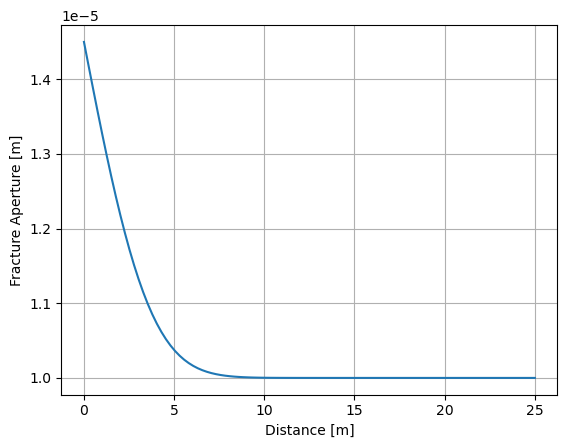

In [16]:
fig,ax = plt.subplots()
ax.plot(x_array, aperture_values)
plt.xlabel("Distance [m]")
plt.ylabel("Fracture Aperture [m]")
plt.grid(True)
plt.show()